## Multiclass Classification using a neural network with Keras
using categorical_crossentropy loss in Keras <br>
use sub-class https://keras.io/models/about-keras-models/

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[0].max()

255

In [5]:
#reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


create a validation set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


### Show the digit images

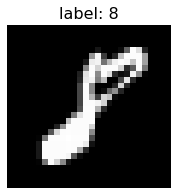

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

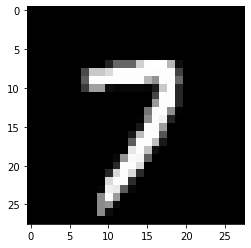

In [8]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [9]:
#the class label of the first training sample
y_train[0]

7

In [11]:
# apply one-hot encoding to the training, validation, and test set
import tensorflow.keras as keras
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
# to use categorical_crossentropy loss in Keras
# we convert every class label into a one-hot vector of 10 elements (there are 10 classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Define the MLP model

In [13]:
class MLP(keras.Model):

    def __init__(self):
        super().__init__()
        self.dense1 = keras.layers.Dense(256, activation='relu', input_shape=(784,))
        self.dense2 = keras.layers.Dense(256, activation='relu')
        self.dense3 = keras.layers.Dense(10, activation='softmax')
    #call is similar to forward in Pytorch
    def call(self, x):
        x = self.dense1(x)
        #print(x.shape)
        x = self.dense2(x)
        y = self.dense3(x)        
        return y
model=MLP()    
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
#we cannot use this
#model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

### Train the model

In [15]:
for epoch in range(0, 10):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #we cannot use this one
    #model.save('NN_multiclass_classification_Keras_CE_model_e'+str(epoch)+'.h5')
    model.save_weights('NN_multiclass_classification_Keras_CE_model_e'+str(epoch)+'.h5')

epoch 0
(None, 256)
(None, 256)
844/844 [==============================] - 5s 5ms/step - loss: 0.3700 - accuracy: 0.8931 - val_loss: 0.1912 - val_accuracy: 0.9455
epoch 1
844/844 [==============================] - 4s 5ms/step - loss: 0.1585 - accuracy: 0.9542 - val_loss: 0.1240 - val_accuracy: 0.9622
epoch 2
844/844 [==============================] - 4s 5ms/step - loss: 0.1098 - accuracy: 0.9689 - val_loss: 0.1012 - val_accuracy: 0.9678
epoch 3
844/844 [==============================] - 4s 5ms/step - loss: 0.0835 - accuracy: 0.9756 - val_loss: 0.0883 - val_accuracy: 0.9732
epoch 4
844/844 [==============================] - 4s 5ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0733 - val_accuracy: 0.9787
epoch 5
844/844 [==============================] - 4s 5ms/step - loss: 0.0540 - accuracy: 0.9842 - val_loss: 0.0711 - val_accuracy: 0.9773
epoch 6
844/844 [==============================] - 4s 5ms/step - loss: 0.0433 - accuracy: 0.9875 - val_loss: 0.0733 - val_accuracy: 0.9778
epo

### Plot training histroy: loss vs epoch and accuracy vs epoch

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

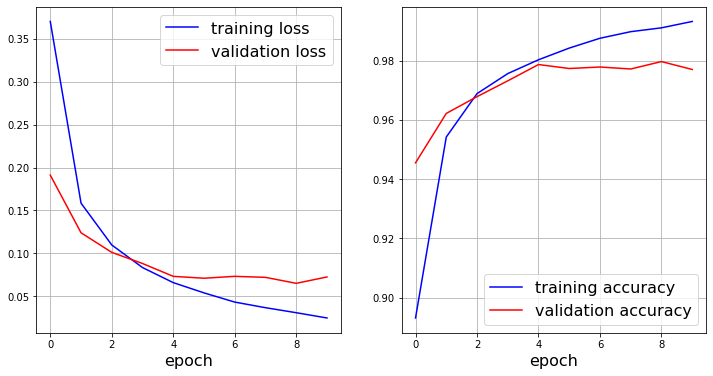

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

after training, we load the best model

In [26]:
np.argmax(acc_val_list)

8

In [27]:
#we cannot use this one
#from tensorflow.keras.models import load_model
#model = load_model('NN_multiclass_classification_Keras_CE_model_e8.h5')
model.load_weights('NN_multiclass_classification_Keras_CE_model_e8.h5')

### Test the model

In [28]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07070997357368469
Test accuracy: 0.9785000085830688


### Make Prediction on the test set

In [29]:
y_test_pred=model.predict(x_test, batch_size=64)

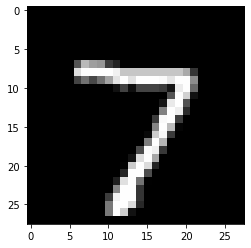

In [30]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [31]:
y_test_pred[0]

array([3.3792600e-07, 4.2308130e-08, 3.8923486e-06, 1.6074071e-05,
       2.0374480e-09, 1.7060319e-08, 6.8707063e-12, 9.9997735e-01,
       1.8479469e-07, 2.1245360e-06], dtype=float32)

In [32]:
np.argmax(y_test_pred[0])

7

In [33]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [34]:
np.argmax(y_test[0])

7